In [1]:
import os
import random
import pickle
import networkx as nx
import math
import time
from time import perf_counter
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
def solution_quality(solution):
    return solution.number_of_edges()

In [3]:
def is_k_connected(G, k):
    if G.number_of_nodes() < k:
        return False
    else:
        return nx.node_connectivity(G) >= k

In [4]:
def remove_nodes_with_less_than_k_neighbors(G, k):
    changed = True
    while changed:
        changed = False
        nodes_to_remove = [node for node in G.nodes if G.degree(node) < k]
        if nodes_to_remove:
            G.remove_nodes_from(nodes_to_remove)
            changed = True
    return G

In [5]:
def shaking(G, k, current_solution):
    modified_solution = current_solution.copy()

    if random.choice([True, False]):
        
        potential_nodes_to_remove = list(modified_solution.nodes())
        
        weights_to_remove = [G.degree(node) for node in potential_nodes_to_remove]
        
        k = min(k, len(potential_nodes_to_remove))
        
        nodes_to_remove = random.choices(potential_nodes_to_remove, weights=weights_to_remove, k=k)
        modified_solution.remove_nodes_from(nodes_to_remove)
    else:
        
        potential_nodes = list(set(G.nodes()) - set(modified_solution.nodes()))
        
        weights = [G.degree(node) for node in potential_nodes]
        
        
        if potential_nodes:
            
            nodes_to_add = random.choices(potential_nodes, weights=weights, k=math.floor(len(potential_nodes)/2))
            modified_solution.add_nodes_from(nodes_to_add)
            
            
            for node in nodes_to_add:
                for neighbor in G.neighbors(node):
                    
                    if neighbor in modified_solution.nodes():
                        modified_solution.add_edge(node, neighbor)
    
    
   
    modified_solution = remove_nodes_with_less_than_k_neighbors(modified_solution, k)
   
    if is_k_connected(modified_solution, k):
        return modified_solution
    else:
        return current_solution

In [6]:
def local_search(G, k, current_solution):
    temp_solution = current_solution.copy()
    nodes = list(current_solution.nodes())
    random.shuffle(nodes)
    
    for node in nodes:
        temp_solution.remove_node(node)
        
        if not is_k_connected(temp_solution, k):
            temp_solution.add_node(node)

    temp_solution = G.subgraph(temp_solution.nodes())
    

    return temp_solution

In [8]:
def vns_algorithm(G, k, max_iter=5):
    if not is_k_connected(G, k):
        print("vns_algorithm: prosledjeni graf ne ispunjava uslov k povezanosti")
        return None
    start_time = perf_counter()
    G = remove_nodes_with_less_than_k_neighbors(G, k)
    best_solution = G.copy()
    while perf_counter() - start_time < 30:
        
        shaken_solution = shaking(G, k, best_solution)
        
        new_solution = local_search(G, k, shaken_solution)
        
        
        if solution_quality(new_solution) < solution_quality(best_solution):
            best_solution = new_solution.copy()
           
    
    return best_solution

In [9]:
def greedy_algorithm(G,k,max_iter=5):
    num_of_iter = 0;
    best_solution = G.copy()
    start_time = time.time()
    while num_of_iter < max_iter:
        new_solution = local_search(G,k,best_solution)
        if solution_quality(new_solution) < solution_quality(best_solution):
            best_solution = new_solution.copy()
        num_of_iter+=1
    end_time = time.time()     
    elapsed_time = end_time - start_time
    return best_solution, elapsed_time
        

In [10]:
def brute_force_algorithm(G, k):
    all_nodes = list(G.nodes())
    n = len(all_nodes)
    start_time = time.time()
    
    for r in range(k, n+1):
        for nodes in combinations(all_nodes, r):
            subgraph = G.subgraph(nodes)
            if is_k_connected(subgraph, k):
                end_time = time.time()  
                elapsed_time = end_time - start_time  
                print(f'Broj cvorova bruteforce resenja je: {subgraph.number_of_nodes()}')
                print(f'Vreme potrebno za izvrsavanje bruteforce algoritma: {elapsed_time:.3f} seconds \n')
                return subgraph  

                
    print("brute_force")
    return None

Pocetni podgraf ima grana: 99


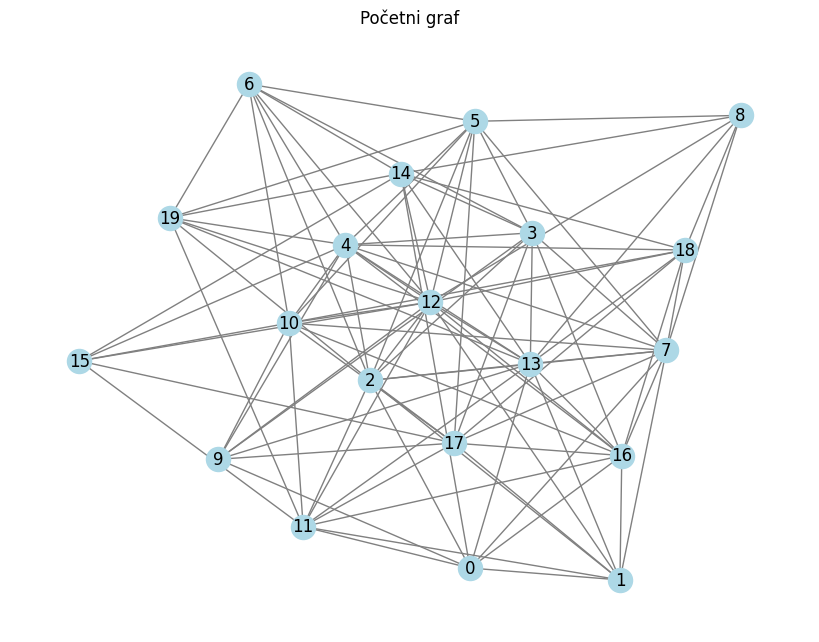

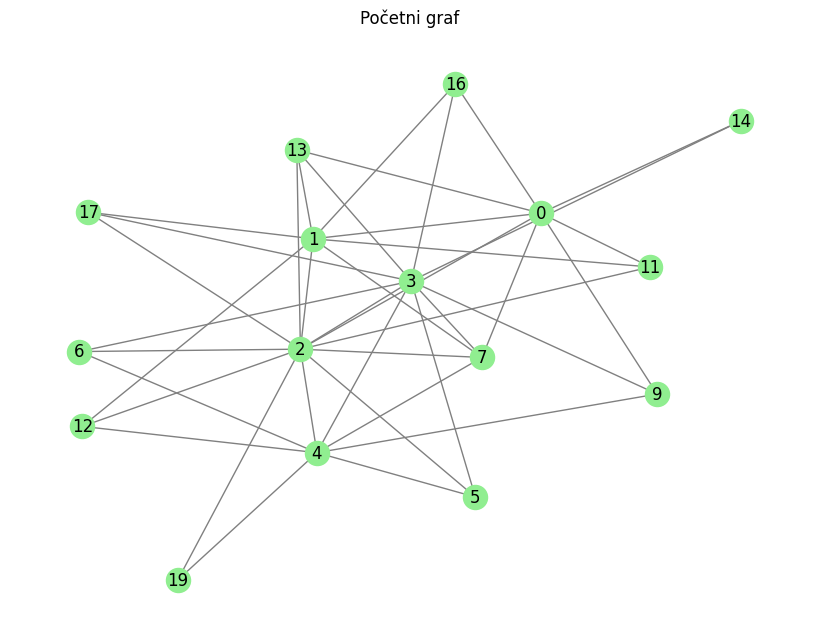

Najmanji k-povezan podgraf ima grana: 40


In [21]:
import matplotlib.pyplot as plt
def brute_force_min_k_connected_subgraph(G, k):
    if not nx.is_k_edge_connected(G, k):
        print("Graf nije k-povezan")
        return

    najmanji_podgraf = None
    najmanji_broj_grana = len(G.edges())

    for r in range(G.number_of_nodes() * k, len(G.edges()) + 1):
        for edges in combinations(G.edges(), r):
            H = G.edge_subgraph(edges).copy()
            
            if all(H.degree(node) >= k for node in H) and is_k_connected(H, k):
                najmanji_podgraf = H
                najmanji_broj_grana = r
                break
                
        if najmanji_podgraf:
            break

    return najmanji_podgraf

G = nx.erdos_renyi_graph(20, 0.5)
k = 2

print("Pocetni podgraf ima grana:", len(G.edges()))
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Početni graf")
plt.show()

najmanji_podgraf = brute_force_min_k_connected_subgraph(G, k)

plt.figure(figsize=(8, 6))
nx.draw(najmanji_podgraf, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Početni graf")
plt.show()

if najmanji_podgraf:
    print("Najmanji k-povezan podgraf ima grana:", len(najmanji_podgraf.edges()))
else:
    print("Nije pronađen k-povezan podgraf.")